<a href="https://colab.research.google.com/github/lindenalex/Qiskit_advanced_tutorials/blob/main/onestep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Numeryczne Rozwiązywanie Rónań Różniczkowych Zwyczajnych
### Uniwersytet Jagielloński 2023
Katedra Teorii Optymalizacji i Sterowania UJ

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Rozwiązania

In [113]:
# def open_euler(f, t, x0, t0):
#     n = len(t)
#     x = np.zeros_like(t)

#     idx = np.argmin(np.abs(t - t0))
#     x[idx] = x0

#     for i in range(idx, n-1):
#         h = t[i+1] - t[i]
#         x[i+1] = x[i] + h * f(t[i], x[i])

#     for i in range(idx, 0, -1):
#         h = t[i] - t[i-1]
#         x[i-1] = x[i] - h * f(t[i-1], x[i-1])

#     return x

import numpy as np
import matplotlib.pyplot as plt


def open_euler(f, x0, t0, T, h):
    if T < t0:
        raise ValueError("Final time T must be greater than or equal to initial time t0.")
    if h <= 0:
        raise ValueError("Step size h must be positive.")

    t = t0
    x = x0
    t_values = [t]
    x_values = [x]

    # March forward in time
    while t < T:
        h_eff = h if t + h <= T else T - t
        x = x + h_eff * f(t, x)
        t = t + h_eff
        t_values.append(t)
        x_values.append(x)

    return t_values, x_values

In [8]:
def heun(f, t, x0, t0):
    n = len(t)
    if hasattr(x0, "__len__"):
        x = np.zeros((n, len(x0)))
    else:
        x = np.zeros(n)

    idx = np.argmin(np.abs(t - t0))
    x[idx] = x0

    for i in range(idx, n-1):
        h = t[i+1] - t[i]
        k1 = f(t[i], x[i])
        x_pred = x[i] + h * k1

        k2 = f(t[i+1], x_pred)
        x[i+1] = x[i] + h * (k1 + k2) / 2

    for i in range(idx, 0, -1):
        h = t[i] - t[i-1]

        # Predictor
        k1 = f(t[i], x[i])
        x_pred = x[i] - h * k1

        # Corrector
        k2 = f(t[i-1], x_pred)
        x[i-1] = x[i] - h * (k1 + k2) / 2

    return x

In [14]:
def modified_euler(f, t, x0, t0):
    t = np.asarray(t)
    N = len(t)
    x0 = np.asarray(x0)

    x = np.zeros((N,) + x0.shape, dtype=x0.dtype)
    x[0] = x0

    for i in range(N - 1):
        h = t[i+1] - t[i]
        k1 = f(t[i], x[i])
        x_mid = x[i] + (h/2) * k1
        k2 = f(t[i] + h/2, x_mid)
        x[i+1] = x[i] + h * k2

    return x

In [17]:
def rk4(f, t, x0, t0):
    t = np.asarray(t)
    N = len(t)
    x0 = np.asarray(x0)

    x = np.zeros((N,) + x0.shape, dtype=x0.dtype)
    x[0] = x0

    for i in range(N - 1):
        h = t[i+1] - t[i]
        ti, xi = t[i], x[i]

        k1 = f(ti, xi)
        k2 = f(ti + h/2, xi + (h/2) * k1)
        k3 = f(ti + h/2, xi + (h/2) * k2)
        k4 = f(ti + h,   xi + h * k3)

        x[i+1] = xi + (h/6) * (k1 + 2*k2 + 2*k3 + k4)

    return x

## Przypadek testowy
Proszę zaimplementować fukcję kwadratową i porónać rozwiązanie dokładne z numerycznym

In [105]:
x0 = 0.
t0 = 0.
T = 1
n = 100
h = 0.01

def exact(t):
    return t ** 2

def f(t, x):
    return 2 * t

t_range = (t0, 1)
t = np.linspace(t_range[0], t_range[1], n)


In [106]:
%%time
x_euler = open_euler(f, x0, t0, T, h)

CPU times: user 57 µs, sys: 0 ns, total: 57 µs
Wall time: 60.1 µs


In [11]:
%%time
x_heun = heun(f, t, x0, t0)

CPU times: user 1 ms, sys: 0 ns, total: 1 ms
Wall time: 875 µs


In [15]:
%%time
x_mod = modified_euler(f, t, x0, t0)

CPU times: user 283 µs, sys: 0 ns, total: 283 µs
Wall time: 290 µs


In [18]:
%%time
x_rk4 = rk4(f, t, x0, t0)

CPU times: user 379 µs, sys: 0 ns, total: 379 µs
Wall time: 385 µs


ValueError: x and y must have same first dimension, but have shapes (100,) and (101,)

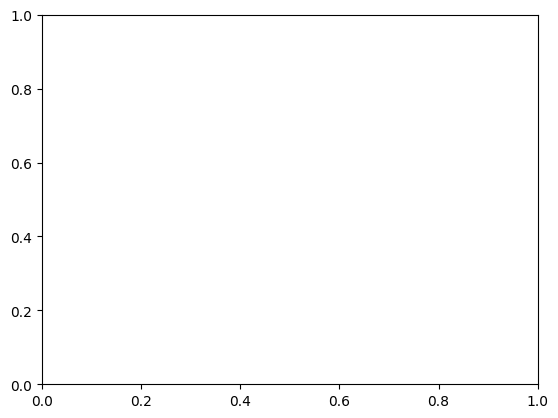

In [108]:
plt.plot(t, x_euler, color="olive")
plt.plot(t, x_heun, color="cyan")
plt.plot(t, x_mod, color="pink")
plt.plot(t, x_rk4, color="green")
plt.plot(t, exact(t), color="red")
plt.grid()

## Zagadnienie 1

In [101]:
def open_euler(f, t, x0, t0, h):
    t = np.asarray(t)
    n = len(t)
    x = np.zeros_like(t)

    idx = np.argmin(np.abs(t - t0))
    x[idx] = x0

    for i in range(idx, n-1):
        x[i+1] = x[i] + h * f(t[i], x[i])

    for i in range(idx, 0, -1):
        x[i-1] = x[i] - h * f(t[i-1], x[i-1])

    return x


def heun(f, t, x0, t0, h):
    t = np.asarray(t)
    n = len(t)
    if hasattr(x0, "__len__"):
        x = np.zeros((n, len(x0)))
    else:
        x = np.zeros(n)

    idx = np.argmin(np.abs(t - t0))
    x[idx] = x0

    for i in range(idx, n-1):
        k1 = f(t[i], x[i])
        x_pred = x[i] + h * k1

        k2 = f(t[i+1], x_pred)
        x[i+1] = x[i] + h * (k1 + k2) / 2

    for i in range(idx, 0, -1):
        # Predictor
        k1 = f(t[i], x[i])
        x_pred = x[i] - h * k1

        # Corrector
        k2 = f(t[i-1], x_pred)
        x[i-1] = x[i] - h * (k1 + k2) / 2

    return x


def modified_euler(f, t, x0, t0, h):
    t = np.asarray(t)
    N = len(t)
    x0 = np.asarray(x0)

    x = np.zeros((N,) + x0.shape, dtype=x0.dtype)
    x[0] = x0

    for i in range(N - 1):
        k1 = f(t[i], x[i])
        x_mid = x[i] + (h/2) * k1
        k2 = f(t[i] + h/2, x_mid)
        x[i+1] = x[i] + h * k2

    return x


def rk4(f, t, x0, t0,):
    t = np.asarray(t)
    N = len(t)
    x0 = np.asarray(x0)

    x = np.zeros((N,) + x0.shape, dtype=x0.dtype)
    x[0] = x0

    for i in range(N - 1):
        h = t[i+1] - t[i]
        ti, xi = t[i], x[i]

        k1 = f(ti, xi)
        k2 = f(ti + h/2, xi + (h/2) * k1)
        k3 = f(ti + h/2, xi + (h/2) * k2)
        k4 = f(ti + h,   xi + h * k3)

        x[i+1] = xi + (h/6) * (k1 + 2*k2 + 2*k3 + k4)

    return x

In [102]:
import math

x0 = 1.
t0 = 0.
n = 100
h = 0.01
t = 1

def exact(t):
    return 2 * math.e ** t - t - 1

def f(t, x):
    return t + x

In [103]:
%%time
x_euler = open_euler(f, t, x0, t0, h)

ValueError: diff requires input that is at least one dimensional

In [96]:
%%time
x_heun = heun(f, t, x0, t0, h)

TypeError: len() of unsized object

In [97]:
%%time
x_mod = modified_euler(f, t, x0, t0, h)

TypeError: len() of unsized object

In [98]:
%%time
x_rk4 = rk4(f, t, x0, t0, h)

TypeError: rk4() takes 4 positional arguments but 5 were given

ValueError: x and y must have same first dimension, but have shapes (1,) and (101,)

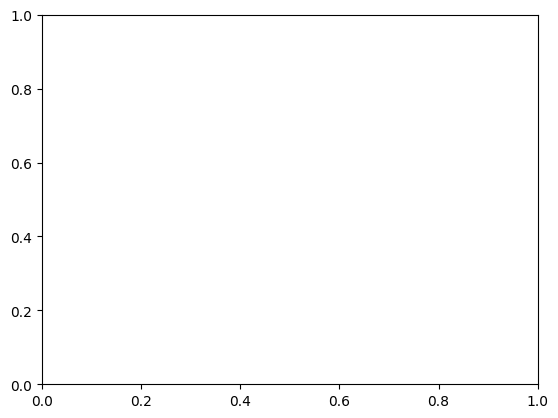

In [99]:
plt.plot(t, x_euler, color="olive")
plt.plot(t, x_heun, color="cyan")
plt.plot(t, x_mod, color="pink")
plt.plot(t, x_rk4, color="green")
plt.plot(t, exact(t), color="red")
plt.grid()

## Zagadnienie 2

In [33]:
import math

x0 = 1.
t0 = 0.
n = 100

def exact(t):
    return 1 / (1 + t)

def f(t, x):
    return -x**2

In [34]:
%%time
x_euler = open_euler(f, t, x0, t0)

CPU times: user 654 µs, sys: 0 ns, total: 654 µs
Wall time: 644 µs


In [35]:
%%time
x_heun = heun(f, t, x0, t0)

CPU times: user 249 µs, sys: 31 µs, total: 280 µs
Wall time: 271 µs


In [36]:
%%time
x_mod = modified_euler(f, t, x0, t0)

CPU times: user 364 µs, sys: 0 ns, total: 364 µs
Wall time: 372 µs


In [37]:
%%time
x_rk4 = rk4(f, t, x0, t0)

CPU times: user 644 µs, sys: 0 ns, total: 644 µs
Wall time: 650 µs


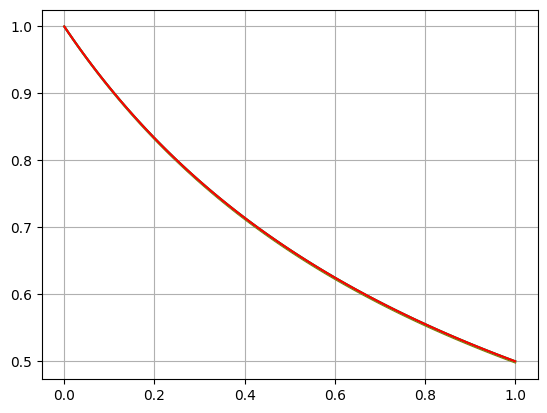

In [38]:
plt.plot(t, x_euler, color="olive")
plt.plot(t, x_heun, color="cyan")
plt.plot(t, x_mod, color="pink")
plt.plot(t, x_rk4, color="green")
plt.plot(t, exact(t), color="red")
plt.grid()

## Zagadnienie 3

In [74]:
import math

x0 = 0.08
t0 = 1
n = 100
h = 0.01

def exact(t):
    return t**2 + 0.4 * t + 0.08

def f(t, x):
    return 5 * (x - t**2)

In [75]:
%%time
x_euler = open_euler(f, t, x0, t0, h)

CPU times: user 208 µs, sys: 26 µs, total: 234 µs
Wall time: 226 µs


In [76]:
%%time
x_heun = heun(f, t, x0, t0, h)

CPU times: user 347 µs, sys: 0 ns, total: 347 µs
Wall time: 338 µs


In [77]:
%%time
x_mod = modified_euler(f, t, x0, t0, h)

CPU times: user 229 µs, sys: 0 ns, total: 229 µs
Wall time: 232 µs


In [78]:
%%time
x_rk4 = rk4(f, t, x0, t0, h)

CPU times: user 283 µs, sys: 36 µs, total: 319 µs
Wall time: 322 µs


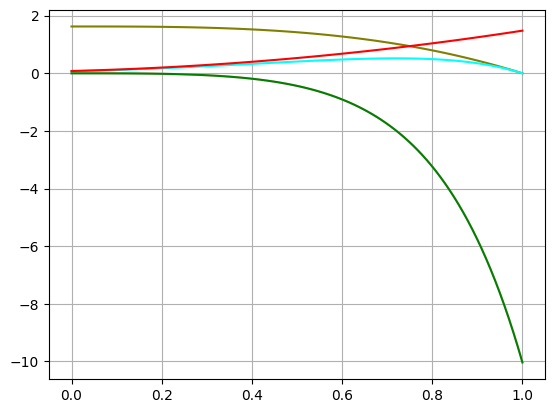

In [79]:
plt.plot(t, x_euler, color="olive")
plt.plot(t, x_heun, color="cyan")
plt.plot(t, x_mod, color="pink")
plt.plot(t, x_rk4, color="green")
plt.plot(t, exact(t), color="red")
plt.grid()